# GRIP @The Sparks Foundation 

# SAVITA BALABHADRAPATRUNI

Task No - 1. PREDICTION USING SUPERVISED ML.

This task requires us to predict the percentage of a student based on the number of study hours

In [1]:
#Import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
#Filter all the warnings

import warnings

#Ignoring the warning messages

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

# Read the data

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Analysing the minimum, maximum and intermediate values; it can be inferred that there are no outliers to be removed

In [8]:
#Check for Null Data

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As the data does not contain null values; no further tampering is required.

# Visualize data using different visualizations to generate interesting & useful insights

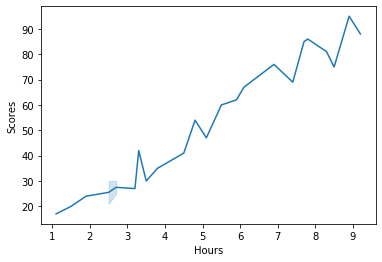

In [9]:
#Lineplot
sns.lineplot(data=df, x="Hours", y="Scores")

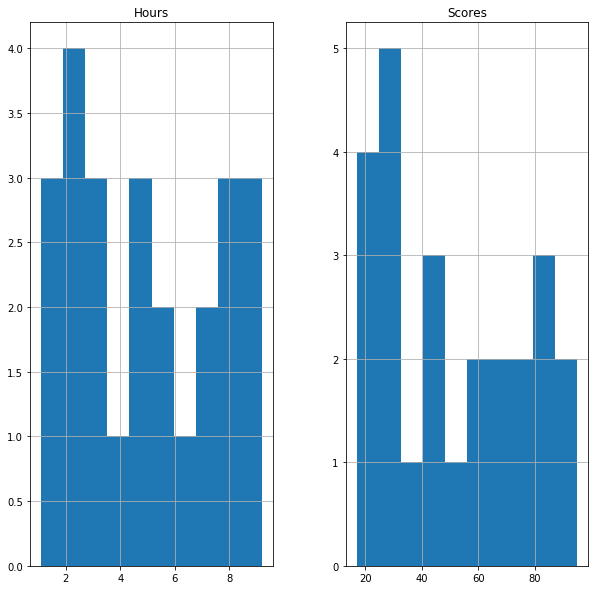

In [10]:
#HISTOGRAM

df.hist(figsize=(10,10))
plt.show()

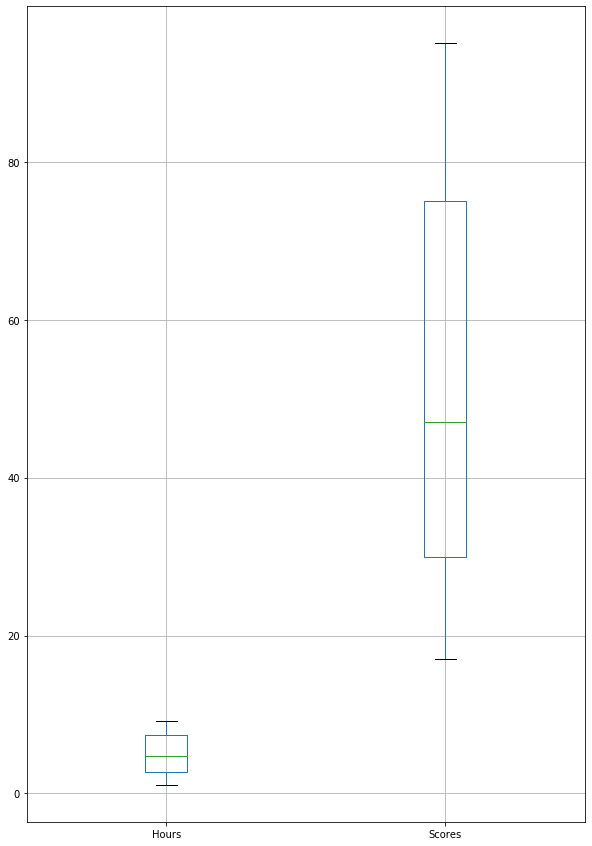

In [11]:
#BOXPLOT

df.boxplot(figsize=(10,15))
plt.show()

The above boxplot shows that there are no outliers howsoever in the data.

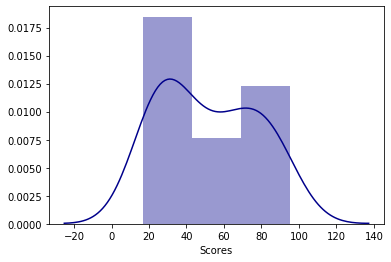

In [12]:
sns.distplot(df['Scores'], hist=True, kde=True, color = 'darkblue')

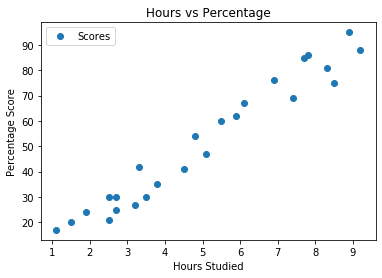

In [13]:
#Scattered Plot

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [14]:
dfx = df.iloc[:, :-1].values  
dfy = df.iloc[:, 1].values 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.2,random_state=7)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV
from sklearn import metrics  

In [17]:
models=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Ridge',Ridge(alpha=1.0)))
models.append(('Lasso',Lasso(alpha=1.0)))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('SVR',SVR(gamma='auto')))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))

In [18]:
acc=[]
nam=[]

for name,model in models:
    kfold = KFold(n_splits=10,random_state=7) 
    cross_val_sc= -1 * cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=kfold)
    reg=model.fit(x_train,y_train)
    accuracy = model.score(x_test,y_test)
    print('{} : acc : {} mse:{}'.format(name,accuracy,cross_val_sc.mean()))
    acc.append(cross_val_sc.mean()*100)
    nam.append(name)

LinearRegression : acc : 0.8735107022601714 mse:36.20064505370134
Ridge : acc : 0.8748028906110836 mse:36.1131612676105
Lasso : acc : 0.8759059730124727 mse:36.18402769763183
KNeighborsRegressor : acc : 0.8213174086138256 mse:48.295999999999985
RandomForestRegressor : acc : 0.8356122525837456 mse:45.4635936596372
AdaBoostRegressor : acc : 0.8796597900832428 mse:60.07542970521543
GradientBoostingRegressor : acc : 0.7868792955666862 mse:61.22071292738356
SVR : acc : -0.8674085561729075 mse:626.8475941453289
DecisionTreeRegressor : acc : 0.7864639884183858 mse:61.3125


From the above; we can conclude that Lasso Regressor gives the best accuracy and low MSE.

In [19]:
model = Lasso(alpha=1.0)
reg = model.fit(x_train,y_train)
accuracy_Lasso = model.score(x_test,y_test)

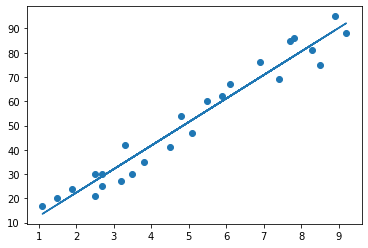

In [20]:
 # Plotting the regression line
    
line = reg.coef_*dfx+reg.intercept_

# Plotting for the data

plt.scatter(dfx, dfy)
plt.plot(dfx, line);
plt.show()

# Predictions

In [21]:
ypred = reg.predict(x_test)

In [22]:
# Comparing Actual vs Predicted

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df1

,Actual,Predicted
0,47,52.366190
1,20,17.474487
2,62,60.119902
3,42,34.920339
4,27,33.951125


In [23]:
# Testing with required data- i.e. score corresponding to 9.25 hours

hours=[[9.25]]
testpred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(testpred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.58856957575344


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred)) 

Mean Absolute Error: 4.760517423802858
